<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Play_Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Project-Play Tennis

## Decision Tree Algorithm:

### A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It's a tree-like model where each node represents a decision or a test on a specific feature, each branch represents the outcome of the test, and each leaf node represents the final prediction or a class label.

### Decision trees have several advantages, including interpretability, simplicity, and the ability to handle both numerical and categorical data. However, they are prone to overfitting, especially when the tree is deep and too complex. To address this, techniques like pruning can be applied to simplify the tree and improve generalization on new, unseen data.

## About Play Tennis Dataset:

The dataset represents a hypothetical set of observations related to playing a particular outdoor activity based on different environmental conditions. The dataset has the following columns:

Day: An identifier for each day (D1, D2, ..., D14).

Outlook: Describes the weather conditions on a given day and can take values like "Sunny," "Overcast," or "Rain."

Temp: Represents the temperature, categorized as "Hot," "Mild," or "Cool."

Humidity: Indicates the humidity level as either "High" or "Normal."

Wind: Describes the wind strength as either "Weak" or "Strong."

Play: The target variable, indicating whether the outdoor activity was played on that day. It has binary values, "Yes" or "No."

It has 14 rows and 5 columns.

## Import Libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get Dataset

In [76]:
df = pd.read_csv('play_tennis.csv')

## Convert Categical to Numerical Data

In [77]:
df = df.drop('day',axis=1)

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
LE = LabelEncoder()

In [80]:
df = df.apply(LE.fit_transform)

In [81]:
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [82]:
df.columns

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

## Train Test Split

In [83]:
X = df.drop('play',axis=1)
y = df['play']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=101)

## Build Decisin Tree Model

In [86]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

## 1-Criterion: "entropy"

In [87]:
DT_ent =DecisionTreeClassifier(criterion="entropy", random_state=42)
DT_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [88]:
y_pred_ent = DT_ent.predict(X_test)

## 2-Criterion: "gini"


In [89]:
DT_g =DecisionTreeClassifier(criterion="gini", random_state=42)
DT_g.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
y_pred_g = DT_g.predict(X_test)

## 3-Criterion: "log_loss"

In [91]:
DT_log =DecisionTreeClassifier(criterion="log_loss", random_state=42)
DT_log.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

In [92]:
y_pred_log=DT_log.predict(X_test)

## Evaluation

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
print("Accuracy entropy:", accuracy_score(y_test, y_pred_ent))
print(50*"*")
print("Accuracy gini:", accuracy_score(y_test, y_pred_g))
print(50*"*")
print("Accuracy log loss:", accuracy_score(y_test, y_pred_log))


Accuracy entropy: 1.0
**************************************************
Accuracy gini: 1.0
**************************************************
Accuracy log loss: 1.0


## Plot Tree

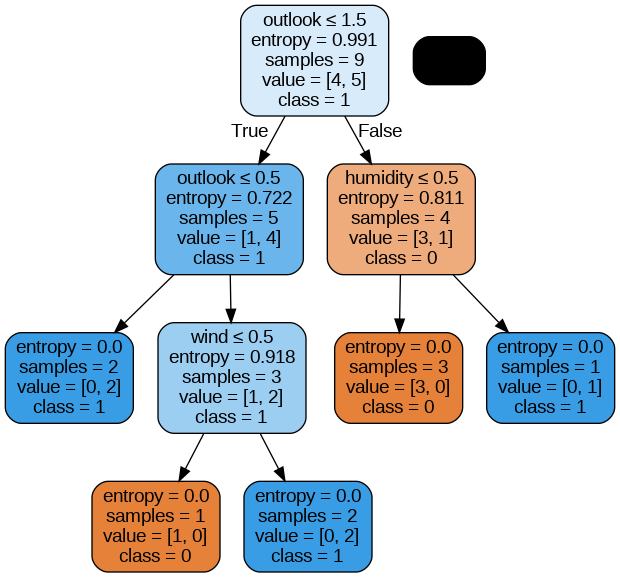

In [95]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(DT_ent, out_file=dot_data, filled=True,
                rounded=True, special_characters=True,
                feature_names =['outlook', 'temp', 'humidity', 'wind'], class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())

In [96]:
DT_ent.feature_importances_

array([0.32733047, 0.        , 0.36381472, 0.30885481])

In [97]:
DT_g.feature_importances_

array([0.3625, 0.    , 0.3375, 0.3   ])

In [98]:
DT_log.feature_importances_

array([0.32733047, 0.        , 0.36381472, 0.30885481])